In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
import lammps_logfile

# Read lammps log

In [4]:
ll_fs=lammps_logfile.File("lammps-grace-fs-dist/log.lammps")

In [5]:
len(ll_fs.partial_logs)

4

In [6]:
df_fs=pd.DataFrame(ll_fs.partial_logs[2])

In [7]:
df_fs.shape

(101, 17)

In [8]:
df_fs.head()

,Step,CPULeft,Temp,PotEng,Fmax,c_min_dist,f_AlLi[2],c_max_gamma,Press,Volume,Density,Pxx,Pyy,Pzz,Pxy,Pxz,Pyz
0,0.0,0.00000,537.87111,-1802.3429,1.628595,2.435473,0.0,0.726912,5498.73530,8558.7111,2.520234,5141.6212,5842.681000,5511.9038,697.75059,353.34569,1067.70500
1,500.0,196.21727,473.69720,-1801.9840,1.547958,2.463640,219.0,0.807184,1990.55710,8590.1024,2.511024,2012.5632,96.714412,3862.3936,200.05452,172.00302,334.49630
2,1000.0,194.13292,487.51934,-1803.6373,1.474431,2.440173,449.0,0.763005,-2838.44630,8639.8395,2.496569,-1349.2416,-2348.142100,-4817.9551,-784.68127,227.49720,-345.27056
3,1500.0,186.41720,515.56549,-1803.0616,1.694432,2.438042,656.0,0.782589,-3283.98860,8659.6685,2.490852,-3627.4014,-2372.367600,-3852.1969,-102.88417,-1210.57210,126.02648
4,2000.0,175.58057,525.03187,-1803.4167,1.598090,2.460482,838.0,0.756066,-952.39407,8621.9558,2.501747,-2065.8751,-2265.149700,1473.8426,-584.47232,930.59402,306.32820


<Axes: >

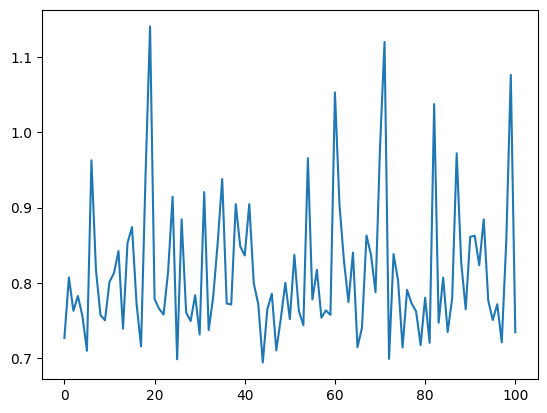

In [9]:
df_fs.c_max_gamma.plot()

In [10]:
ll_2l=lammps_logfile.File("lammps-grace-2L/log.lammps")

In [11]:
df_2l=pd.DataFrame(ll_2l.partial_logs[2])
df_2l.shape

(70, 16)

In [12]:
df_2l.head()

,Step,CPULeft,Temp,PotEng,Fmax,c_min_dist,f_AlLi[2],Press,Volume,Density,Pxx,Pyy,Pzz,Pxy,Pxz,Pyz
0,0.0,0.0000,519.37211,-1801.8326,1.927877,2.413471,0.0,480.66581,8564.1045,2.518647,1411.00580,-377.53439,408.52603,1604.73440,542.460520,449.33549
1,500.0,2217.8192,499.48991,-1803.1288,1.801732,2.417491,237.0,3676.44770,8515.7328,2.532953,4067.98940,1920.96510,5040.38860,-1140.89460,600.320080,289.14114
2,1000.0,1969.3666,492.41021,-1804.6881,1.583824,2.434631,486.0,2955.27370,8515.4130,2.533048,798.37563,4691.64620,3375.79920,311.05134,6.343193,222.72577
3,1500.0,1874.8992,529.68035,-1804.3540,1.523932,2.436047,737.0,1922.98540,8529.2661,2.528934,2784.27220,2046.50410,938.17991,-229.89012,84.860900,-529.96553
4,2000.0,1820.9599,483.56357,-1804.0886,1.577194,2.443743,996.0,446.94422,8547.0579,2.523670,694.20787,-271.32142,917.94621,-812.34146,23.253002,726.04814


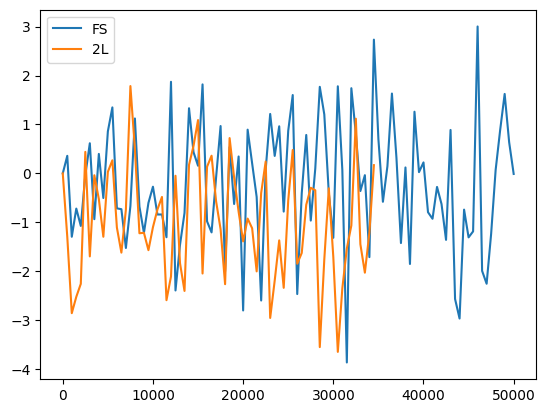

In [13]:
plt.plot(df_fs['Step'], df_fs['PotEng']-df_fs.iloc[0]['PotEng'], label='FS')
plt.plot(df_2l['Step'], df_2l['PotEng']-df_2l.iloc[0]['PotEng'], label='2L')
plt.legend()


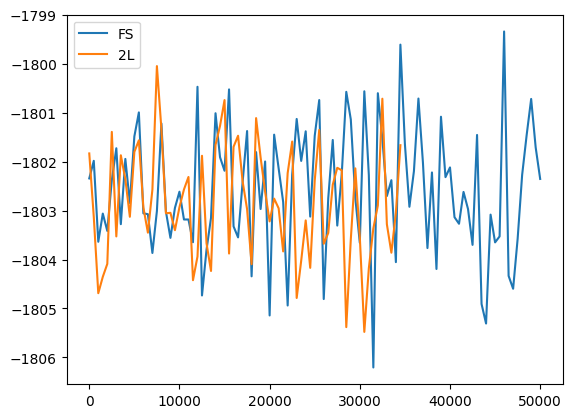

In [14]:
plt.plot(df_fs['Step'], df_fs['PotEng'], label='FS')
plt.plot(df_2l['Step'], df_2l['PotEng'], label='2L')
plt.legend()


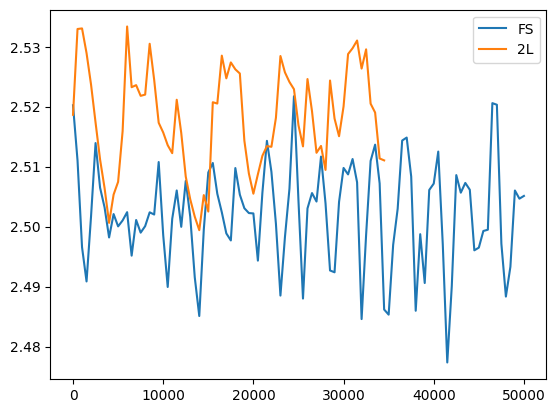

In [15]:
plt.plot(df_fs['Step'], df_fs['Density'], label='FS')
plt.plot(df_2l['Step'], df_2l['Density'], label='2L')
plt.legend()


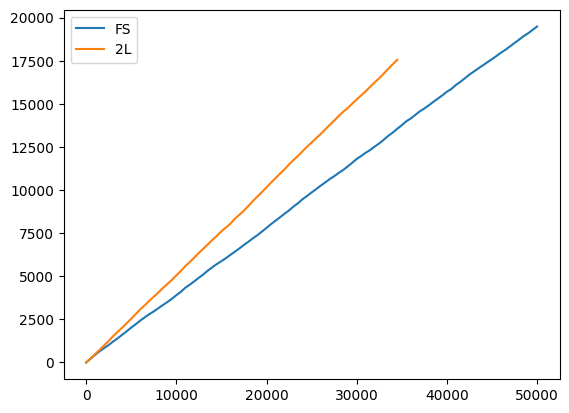

In [16]:
plt.plot(df_fs['Step'], df_fs['f_AlLi[2]'], label='FS')
plt.plot(df_2l['Step'], df_2l['f_AlLi[2]'], label='2L')
plt.legend()
